# Trabajo Práctico 2:  A/B Testing

**Profesor**: Saúl Calderón Ramírez

**Estudiantes**:

* Ricardo Chacon
* Marco Ferraro
* Gabriel Valentine




Siguiendo del trabajo práctico anterior, el archivo de donde extraeremos los datos tiene de nombre `pima-indians-diabetes.csv`.

###**Calculo de pares de densidad y divergencia KL**

En esta etapa, nos enfocaremos en calcular los pares de densidad correspondientes para cada dimensión o característica en función de los valores de destino (target values) en nuestro conjunto de datos. Para lograr esto, emplearemos un enfoque basado en histogramas. El objetivo es obtener resultados estructurados y manejables que puedan representarse eficazmente como una matriz de tuplas.

Procedimiento:

* Selección de dimensiones y valores de destino: Comenzaremos seleccionando las dimensiones (características) que deseamos analizar en nuestro conjunto de datos. Estas dimensiones se considerarán las variables independientes en nuestros cálculos. Además, identificaremos los valores de destino, en este caso, las clases (por ejemplo, "diabetes" y "no diabetes"), que serán las variables dependientes.

* Cálculo de histogramas de densidad: Para cada par de dimensión y valor de destino, calcularemos un histograma de densidad. El histograma de densidad representa la distribución de valores de una característica en función de una clase específica. Esto nos proporcionará información detallada sobre cómo se distribuyen los valores de esa característica en cada clase.

* Almacenamiento en una lista de tuplas: Al completar los cálculos de los histogramas de densidad para todos los pares de dimensiones y valores de destino, almacenaremos los resultados en una lista de tuplas. Cada tupla contendrá información sobre la dimensión, el valor de destino correspondiente y el histograma de densidad asociado.

Este enfoque nos permitirá organizar los resultados de manera estructurada, lo que facilita el análisis y la comparación de las distribuciones de características para cada valor de destino. Además, proporciona una base sólida para realizar análisis estadísticos y posteriores visualizaciones que puedan ayudar a comprender mejor cómo las características afectan la variable objetivo, en este caso, la presencia o ausencia de diabetes.

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
archivo = '/content/drive/MyDrive/Colab Notebooks/Módulo 3. Estadística/Trabajos prácticos/Trabajo práctico 1/pima-indians-diabetes.csv'

df = pd.read_csv(archivo, header = None)

df.head()

Mounted at /content/drive


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Por motivos de manipulacion, vamos a renombar las columnas del dataframe de acuerdo a la documentacion de los datos. Adicionalmente con el metodo `head()` podemos ver un resumen de los datos.

In [2]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']

diabetes_df = df.rename(columns=dict(zip(df.columns, column_names)))

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
class_0_data = diabetes_df[diabetes_df['Class'] == 0]
class_1_data = diabetes_df[diabetes_df['Class'] == 1]

class_0_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [4]:
def calculate_density_pairs(class_0_data, class_1_data):
    # Convert the dataframes to NumPy arrays
    class_0_array = class_0_data.values[:, :-1]  # Exclude the last column (target column)
    class_1_array = class_1_data.values[:, :-1]

    # Calculate density pairs without explicit for loops
    density_pairs = [(np.mean(np.histogram(class_0_array[:, i], bins=20, density=True)[0]),
                     np.mean(np.histogram(class_1_array[:, i], bins=20, density=True)[0])) for i in range(class_0_array.shape[1])]

    return density_pairs

In [5]:
density_pairs = calculate_density_pairs(class_0_data, class_1_data)
density_pairs

[(0.07692307692307693, 0.058823529411764705),
 (0.005076142131979695, 0.005025125628140704),
 (0.008196721311475412, 0.008771929824561405),
 (0.01666666666666667, 0.0101010101010101),
 (0.0013440860215053762, 0.001182033096926714),
 (0.017452006980802796, 0.014903129657228018),
 (0.444247001332741, 0.4288164665523156),
 (0.016666666666666666, 0.02040816326530612)]

Una vez que hayamos obtenido los pares de densidad, podremos calcular el índice de divergencia Kullback-Leibler (también conocido como la "divergencia de K-L") para cada conjunto de pares. Es importante recordar que cada par de densidad representa la distribución de una dimensión de los datos, donde el primero corresponde al conjunto de datos de pacientes que no tienen diabetes y el segundo al conjunto de datos de pacientes que sí tienen diabetes.

El índice de divergencia Kullback-Leibler es una medida que nos permite cuantificar la diferencia entre dos distribuciones de probabilidad. En este contexto, se aplicará para evaluar cuán diferentes son las distribuciones de las características entre los grupos de pacientes con y sin diabetes. Cuanto mayor sea la divergencia K-L entre las dos distribuciones, mayor será la diferencia entre ellas en términos de las características analizadas.

Este cálculo es esencial para comprender y cuantificar la contribución de cada característica en la diferenciación entre los grupos de pacientes con y sin diabetes. Los valores de la divergencia K-L pueden proporcionar información valiosa sobre qué características son más informativas en la identificación de la enfermedad y cuáles tienen un impacto menor. El análisis de estos índices permitirá identificar características significativas que puedan utilizarse en futuros modelos de predicción o diagnóstico de diabetes.

### **Selección de mejores features.**

Basándonos en el cálculo de la función de Kullback-Leibler, vamos a implementar un algoritmo que tome un parámetro tau. Este parámetro nos indicará cuántas de las mejores características deseamos seleccionar. Además, el algoritmo devolverá el DataFrame restringido con las mejores características.

**Procedimiento**:

Ordenar por el valor de la función Kullback-Leibler: Primero, ordenaremos las características (columnas) del DataFrame según los valores de la función Kullback-Leibler en orden descendente. Esto nos permitirá identificar las características que tienen la mayor contribución en la diferenciación entre las clases.

* Seleccionar las mejores características: A continuación, seleccionaremos las mejores características según el valor de tau. Si tau es igual a 5, seleccionaremos las 5 mejores características; si es igual a 10, seleccionaremos las 10 mejores características, y así sucesivamente.

* Crear un nuevo DataFrame con las mejores características: A partir de la selección realizada en el paso anterior, crearemos un nuevo DataFrame que contendrá únicamente las características elegidas. Este DataFrame restringido será el resultado final y contendrá solo las características más relevantes según el valor de tau.

* Devolver el DataFrame restringido: Finalmente, devolveremos el DataFrame restringido que contiene las mejores características. Este DataFrame es el que se utilizará en análisis posteriores y en la construcción de modelos de predicción.

La capacidad de elegir un valor tau nos permite ajustar el número de características seleccionadas según nuestros requisitos y objetivos específicos. La selección de las mejores características es esencial para reducir la dimensionalidad de los datos y centrarse en aquellas que tienen un mayor impacto en la predicción o el diagnóstico de la diabetes.

In [6]:
import math

def calculate_KL(density_pairs, column_names):
    divergences = []

    for (p, q), column_name in zip(density_pairs, column_names):
        p = max(p, 1e-10)
        q = max(q, 1e-10)

        divergence = p * math.log(p / q)
        divergences.append((column_name, divergence))

    return divergences



In [7]:
KL_scores = calculate_KL(density_pairs, diabetes_df.columns)
KL_scores

[('Pregnancies', 0.0206356912765138),
 ('Glucose', 5.127459891626243e-05),
 ('BloodPressure', -0.000555922920809516),
 ('SkinThickness', 0.008346254798541492),
 ('Insulin', 0.0001726859203939937),
 ('BMI', 0.0027553825524771793),
 ('DiabetesPedigreeFunction', 0.015704889632896825),
 ('Age', -0.003375404401857899)]

Al analizar los resultados, observamos que el índice que presenta el valor más alto es el de BMI. Esto indica que las distribuciones de las características, en particular la del índice de masa corporal (BMI), son las que varían significativamente entre las diferentes clases (diabetes y no diabetes).

Esta observación es valiosa porque señala que el índice de masa corporal puede desempeñar un papel importante en la diferenciación entre los grupos de pacientes con y sin diabetes. El hecho de que el índice de masa corporal presente una alta divergencia Kullback-Leibler sugiere que podría ser una característica distintiva que contribuye a la identificación de la enfermedad. En otras palabras, el BMI puede ser un indicador relevante para predecir o diagnosticar la diabetes, ya que sus distribuciones en las dos clases son distintas.

Estos resultados pueden orientar futuros análisis y modelos de predicción, destacando la importancia de considerar el BMI como una característica influyente en la evaluación y detección de la diabetes.

In [8]:
def select_best_tau_features_from_kl_list(kl_scores, tau):
    sorted_KL_scores = sorted(kl_scores, key=lambda x: x[1], reverse=True)

    selected_dimensions = [item[0] for item in sorted_KL_scores[:tau]]

    return selected_dimensions


In [9]:
def select_best_features_kl(X, tau):

    X_class_0 = X[X['Class'] == 0]
    X_class_1 = X[X['Class'] == 1]

    X_density_pairs = calculate_density_pairs(X_class_0, X_class_1)
    kl_scores = calculate_KL(X_density_pairs,  diabetes_df.columns)
    selected_dimensions = select_best_tau_features_from_kl_list(kl_scores, tau)

    X_transformed = X.loc[:, selected_dimensions]

    return X_transformed

### **Experimento con Maquina de Soporte Vectorial.**

En esta sección, vamos a llevar a cabo un experimento utilizando una Máquina de Soporte Vectorial (SVM) para la clasificación de datos. Para este experimento, utilizaremos diferentes valores de tau, específicamente, 2, 3, 4, 5 y 8. El valor de tau indica cuántas de las mejores dimensiones seleccionadas previamente se utilizarán en el modelo. Un valor de tau igual a 8 significa que no se eliminará ninguna dimensión, mientras que otros valores de tau indican cuántas dimensiones se retendrán.

Este experimento nos proporcionará información sobre cuál es el valor de tau más adecuado y cómo la selección de características influye en la capacidad de predicción del modelo SVM. El objetivo es encontrar el equilibrio adecuado entre la reducción de la dimensionalidad y la precisión de la predicción. Como métrica vamos a utilizar el accuracy result.

Antes de instanciar y entrenar el modelo SVM, dividiremos el conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de pruebas. Usaremos una división típica de datos en la que el conjunto de pruebas contendrá el 30% de los datos y el conjunto de entrenamiento contendrá el 70% restante. Esto nos permitirá evaluar la capacidad del modelo para generalizar a datos no vistos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(diabetes_df.iloc[:, :-1], diabetes_df['Class'], test_size=0.3, random_state=42)


In [ ]:
taus = [2, 3, 4, 5, 8]

results = {'Tau': [], 'Accuracy': []}

for tau in taus:
    X_transformed = select_best_features_kl(diabetes_df, tau)

    X_train_transformed, X_test_transformed, _, _ = train_test_split(X_transformed, diabetes_df['Class'], test_size=0.3, random_state=42)

    svm_transformed = SVC()
    svm_transformed.fit(X_train_transformed, y_train)
    accuracy_transformed = accuracy_score(y_test, svm_transformed.predict(X_test_transformed))

    results['Tau'].append(tau if tau is not None else 'None')
    results['Accuracy'].append(accuracy_transformed)


results_df = pd.DataFrame(results)
print("Results:")
print(results_df)

Results:
   Tau  Accuracy
0    2  0.653680
1    3  0.662338
2    4  0.666667
3    5  0.640693
4    8  0.735931


Al analizar los resultados de nuestro experimento con diferentes valores de `tau` en el modelo SVM, podemos observar ciertos patrones que proporcionan valiosa información:

1. **Mejor precisión con Tau igual a 8:** El valor de `tau` igual a 8, que indica que no se eliminan dimensiones, resulta en el mejor resultado de precisión (accuracy). Esto significa que el modelo SVM utiliza todas las dimensiones de características disponibles para hacer predicciones y logra una precisión más alta. Sin embargo, esta ventaja en precisión puede estar asociada con un mayor costo computacional y de procesamiento, especialmente si el conjunto de datos es grande y las dimensiones son numerosas.

2. **Tau igual a 4 como compromiso:** Por otro lado, al utilizar un valor de `tau` igual a 4, se logra un buen equilibrio entre la precisión del modelo y la reducción de la dimensionalidad. Esto indica que, al mantener solo cuatro de las dimensiones más relevantes, aún podemos obtener un rendimiento bastante alto del modelo. Esto puede ser beneficioso en situaciones donde el poder de cómputo y procesamiento es una consideración importante, ya que reducir la dimensionalidad puede acelerar significativamente el tiempo de entrenamiento y predicción.

La elección del valor de `tau` dependerá de las prioridades y restricciones específicas del problema. Si se busca la máxima precisión y se dispone de suficiente capacidad de cómputo, Tau igual a 8 puede ser la elección. Sin embargo, si la eficiencia computacional es una preocupación, Tau igual a 4 puede ofrecer un buen equilibrio entre precisión y complejidad computacional.


### **1. Planteamiento**

Hipótesis Nula (H0): No hay diferencia significativa en la precisión de la clasificación entre el tratamiento A (uso del algoritmo del perceptrón sin selección de características) y el tratamiento B (uso de selección de características con τ=8).

Hipótesis Alternativa (H1): Existe una diferencia significativa en la precisión de la clasificación entre el tratamiento A y el tratamiento B.

En términos más concretos:

H0: Precisión(tratamiento A) = Precisión(tratamiento B)

H1: Precisión(tratamiento A) ≠ Precisión(tratamiento B)



### **2. Métrica del F1-score**



In [27]:
import torch

def f1_score_pytorch(y_true, y_pred):

    y_true = torch.tensor(np.array(y_true))
    y_pred = torch.tensor(np.array(y_pred))
    precision = torch.sum((y_true == 1) & (y_pred == 1)).float() / (torch.sum(y_pred == 1).float() + 1e-7)
    recall = torch.sum((y_true == 1) & (y_pred == 1)).float() / (torch.sum(y_true == 1).float() + 1e-7)

    f1 = 2 * (precision * recall) / (precision + recall + 1e-7)

    return f1


Pruebas unitarias:

In [65]:
# Prueba Unitaria 1
y_true = torch.tensor([1, 0, 1, 1, 0, 1])
y_pred = torch.tensor([1, 1, 0, 1, 0, 0])

f1_pytorch = f1_score_pytorch(y_true, y_pred)
print(f'F1-score (PyTorch): {f1_pytorch.item()}')

# Comparación con la implementación de scikit-learn
from sklearn.metrics import f1_score as f1_sklearn

f1_sklearn = f1_sklearn(y_true.cpu().numpy(), y_pred.cpu().numpy())
print(f'F1-score (scikit-learn): {f1_sklearn}')


F1-score (PyTorch): 0.5714284777641296
F1-score (scikit-learn): 0.5714285714285715


In [68]:
# Prueba Unitaria 2
y_true_2 = torch.tensor([0, 0, 1, 1, 1, 0])
y_pred_2 = torch.tensor([0, 1, 0, 1, 0, 1])

f1_pytorch_2 = f1_score_pytorch(y_true_2, y_pred_2)
print(f'F1-score (PyTorch): {f1_pytorch_2.item()}')

from sklearn.metrics import f1_score as f1_sklearn

f1_sklearn_2 = f1_sklearn(y_true_2.cpu().numpy(), y_pred_2.cpu().numpy())
print(f'F1-score (scikit-learn): {f1_sklearn_2}')



F1-score (PyTorch): 0.333333283662796
F1-score (scikit-learn): 0.3333333333333333


### **3. Particiones de los datos**


Para crear 30 particiones diferentes con reemplazo, implementamos la función train_test_split de la librería scikit-learn, asegurándonos de establecer el parámetro stratify para mantener la misma proporción de clases en cada partición.

In [29]:
from sklearn.model_selection import train_test_split

num_partitions = 30
partitions = []

for _ in range(num_partitions):
    X_train, X_test, y_train, y_test = train_test_split(diabetes_df.iloc[:, :-1], diabetes_df['Class'], test_size=0.3, stratify=diabetes_df['Class'], random_state=None)
    partitions.append((X_train, X_test, y_train, y_test))


Para cada partición, hay que aplicar ambos tratamientos y registrar los resultado. Teniendo en cuanta que Tau igual a 8 para el tratamiento B.

In [30]:
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import SelectKBest, chi2


# Define los tratamientos A y B
def tratamiento_A(X_train, X_test, y_train, y_test):
    perceptron = Perceptron()
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    return y_test, y_pred

def tratamiento_B(X_train, X_test, y_train, y_test, tau):
    selector = SelectKBest(chi2, k=tau)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    perceptron = Perceptron()
    perceptron.fit(X_train_selected, y_train)
    y_pred = perceptron.predict(X_test_selected)
    return y_test, y_pred


# Prueba ambos tratamientos en las particiones definidas
results_A = []
results_B = []

for X_train, X_test, y_train, y_test in partitions:
    y_true_A, y_pred_A = tratamiento_A(X_train, X_test, y_train, y_test)
    f1_A = f1_score_pytorch(y_true_A, y_pred_A)
    results_A.append(f1_A)

    y_true_B, y_pred_B = tratamiento_B(X_train, X_test, y_train, y_test, tau=8)
    f1_B = f1_score_pytorch(y_true_B, y_pred_B)
    results_B.append(f1_B)

#F1-score para A
y_true_pytorchA = torch.tensor(np.array(y_true_A))
y_pred_pytorchA = torch.tensor(np.array(y_pred_A))
f1_pytorchA = f1_score_pytorch(y_true_pytorchA, y_pred_pytorchA)

print(f'F1-score A: {f1_pytorchA.item()}')

#F1-score para B
y_true_pytorchB = torch.tensor(np.array(y_true_B))
y_pred_pytorchB = torch.tensor(np.array(y_pred_B))
f1_pytorchB = f1_score_pytorch(y_true_pytorchB, y_pred_pytorchB)

print(f'F1-score B: {f1_pytorchB.item()}')


F1-score A: 0.17582416534423828
F1-score B: 0.17582416534423828


 Validamos que ambos tratamientos utilizan las mismas particiones

In [32]:
# Verificar que ambos tratamientos usan las mismas particiones
for i in range(5):
    print(f"Partición {i+1}")
    print(f"Tratamiento A: X_train.shape={partitions[i][0].shape}, X_test.shape={partitions[i][1].shape}")
    print(f"Tratamiento B: X_train.shape={partitions[i][0].shape}, X_test.shape={partitions[i][1].shape}")


Partición 1
Tratamiento A: X_train.shape=(537, 8), X_test.shape=(231, 8)
Tratamiento B: X_train.shape=(537, 8), X_test.shape=(231, 8)
Partición 2
Tratamiento A: X_train.shape=(537, 8), X_test.shape=(231, 8)
Tratamiento B: X_train.shape=(537, 8), X_test.shape=(231, 8)
Partición 3
Tratamiento A: X_train.shape=(537, 8), X_test.shape=(231, 8)
Tratamiento B: X_train.shape=(537, 8), X_test.shape=(231, 8)
Partición 4
Tratamiento A: X_train.shape=(537, 8), X_test.shape=(231, 8)
Tratamiento B: X_train.shape=(537, 8), X_test.shape=(231, 8)
Partición 5
Tratamiento A: X_train.shape=(537, 8), X_test.shape=(231, 8)
Tratamiento B: X_train.shape=(537, 8), X_test.shape=(231, 8)


Tanto el Tratamiento A como el Tratamiento B están utilizando las mismas particiones para entrenamiento y prueba en todas las 5 particiones de ejemplo.Esto significa que ambos tratamientos están siendo evaluados en las mismas condiciones.

Los datos no están apareados en este contexto. Cada partición representa un conjunto de datos independiente y se aplica tanto al Tratamiento A como al Tratamiento B. Por lo tanto, se estan realizando pruebas independientes en diferentes conjuntos de datos.

### **4. N = 30 replicas para los K = 2 tratamientos**

In [39]:
import numpy as np

#listas para almacenar los resultados de las métricas
f1_scores_A = []
f1_scores_B = []

#listas para almacenar los resultados de las métricas PyTorch
f1_scores_A_pytorch = []
f1_scores_B_pytorch = []

#réplicas
N = 30


for i in range(N):

    X_train, X_test, y_train, y_test = train_test_split(diabetes_df.iloc[:, :-1], diabetes_df['Class'], test_size=0.3, stratify=diabetes_df['Class'], random_state=None)

    #tratamiento A
    y_true_A, y_pred_A = tratamiento_A(X_train, X_test, y_train, y_test)
    f1_A = f1_score_pytorch(y_true_A, y_pred_A)
    f1_scores_A.append(f1_A)

    y_true_A_pytorch = torch.tensor(np.array(y_true_A))
    y_pred_A_pytorch = torch.tensor(np.array(y_pred_A))
    f1_A_pytorch = f1_score_pytorch(y_true_A_pytorch, y_pred_A_pytorch)
    f1_scores_A_pytorch.append(f1_A_pytorch.item())

    #tratamiento B
    y_true_B, y_pred_B = tratamiento_B(X_train, X_test, y_train, y_test, tau=8)
    f1_B = f1_score_pytorch(y_true_B, y_pred_B)
    f1_scores_B.append(f1_B)

    y_true_B_pytorch = torch.tensor(np.array(y_true_B))
    y_pred_B_pytorch = torch.tensor(np.array(y_pred_B))
    f1_B_pytorch = f1_score_pytorch(y_true_B_pytorch, y_pred_B_pytorch)
    f1_scores_B_pytorch.append(f1_B_pytorch.item())

#tabla con los resultados
import pandas as pd

results_df = pd.DataFrame({

    'F1-Score Tratamiento A': f1_scores_A_pytorch,
    'F1-Score Tratamiento B': f1_scores_B_pytorch
})

#estadísticas descriptivas para A
media_A = results_df['F1-Score Tratamiento A'].mean()
mediana_A = results_df['F1-Score Tratamiento A'].median()
desviacion_estandar_A = results_df['F1-Score Tratamiento A'].std()
inclinacion_A = results_df['F1-Score Tratamiento A'].skew()

#estadísticas descriptivas para B
media_B = results_df['F1-Score Tratamiento B'].mean()
mediana_B = results_df['F1-Score Tratamiento B'].median()
desviacion_estandar_B = results_df['F1-Score Tratamiento B'].std()
inclinacion_B = results_df['F1-Score Tratamiento B'].skew()

#imprimir resultados
print("Resultados:")
print(results_df)


print(f'{"Tratamiento":<15}{"Media":<10}{"Mediana":<10}{"Desviación Estándar":<25}{"Inclinación":<15}')
print(f'{"A":<15}{media_A:<10.2f}{mediana_A:<10.2f}{desviacion_estandar_A:<25.2f}{inclinacion_A:<15.2f}')
print(f'{"B":<15}{media_B:<10.2f}{mediana_B:<10.2f}{desviacion_estandar_B:<25.2f}{inclinacion_B:<15.2f}')



Resultados:
    F1-Score Tratamiento A  F1-Score Tratamiento B
0                 0.185567                0.185567
1                 0.541516                0.541516
2                 0.442748                0.442748
3                 0.552631                0.552631
4                 0.388060                0.388060
5                 0.147368                0.147368
6                 0.230769                0.230769
7                 0.134831                0.134831
8                 0.130435                0.130435
9                 0.525490                0.525490
10                0.519480                0.519480
11                0.023810                0.023810
12                0.501650                0.501650
13                0.402985                0.402985
14                0.525974                0.525974
15                0.108696                0.108696
16                0.121212                0.121212
17                0.514658                0.514658
18                0

Con base en estos resultados, parece que no hay una mejora significativa entre los tratamientos A y B. Ambos tienen un rendimiento muy similar según el F1-Score, ya que muestran resultados exactamente iguales. Además, no es posible concluir definitivamente si las tasas de aciertos de ambos tratamientos siguen una distribución normal. Los estadísticos descriptivos (media, mediana, desviación estándar e inclinación) nos dan información sobre la tendencia central, dispersión y forma de la distribución, pero no dan una prueba formal de normalidad.

### **5. Histograma, diagrama de cajas y p-p plot**

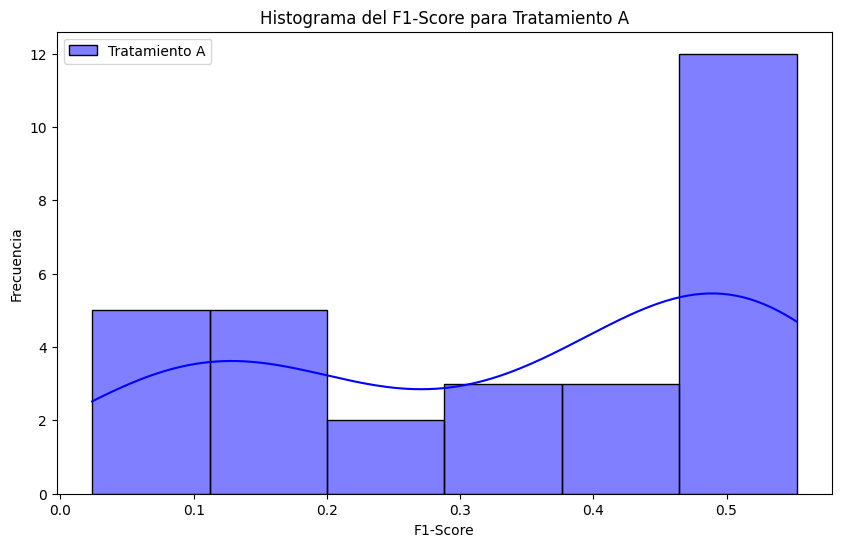

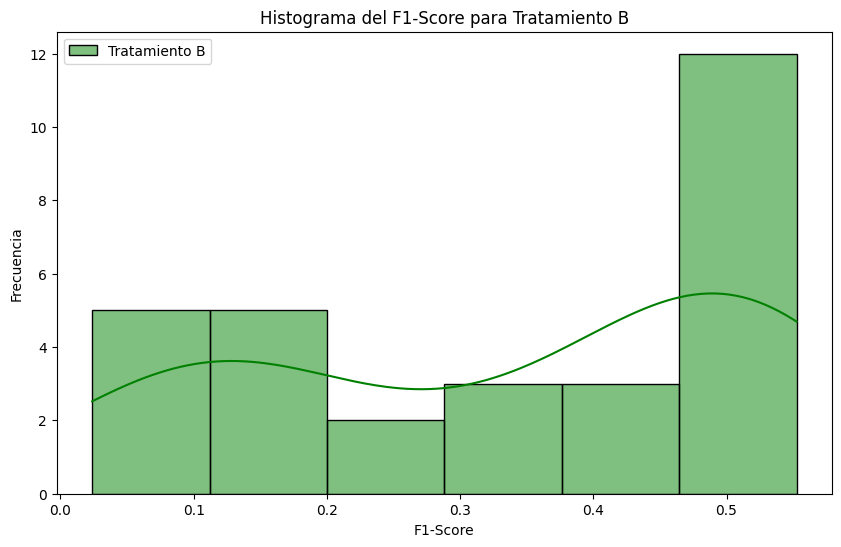

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para Tratamiento A
plt.figure(figsize=(10, 6))
sns.histplot(results_df['F1-Score Tratamiento A'], kde=True, color='blue', label='Tratamiento A')
plt.title('Histograma del F1-Score para Tratamiento A')
plt.xlabel('F1-Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Histograma para Tratamiento B
plt.figure(figsize=(10, 6))
sns.histplot(results_df['F1-Score Tratamiento B'], kde=True, color='green', label='Tratamiento B')
plt.title('Histograma del F1-Score para Tratamiento B')
plt.xlabel('F1-Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

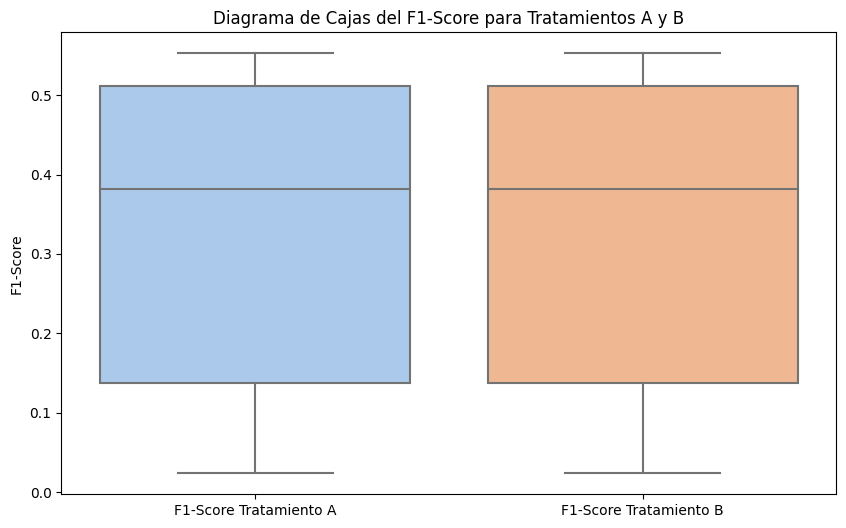

In [41]:
# Boxplot para Tratamiento A y B juntos
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df[['F1-Score Tratamiento A', 'F1-Score Tratamiento B']], palette='pastel')
plt.title('Diagrama de Cajas del F1-Score para Tratamientos A y B')
plt.ylabel('F1-Score')
plt.show()

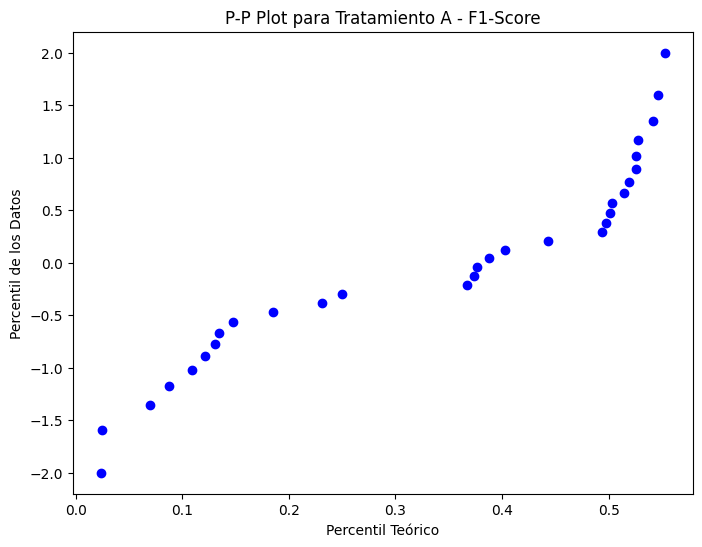

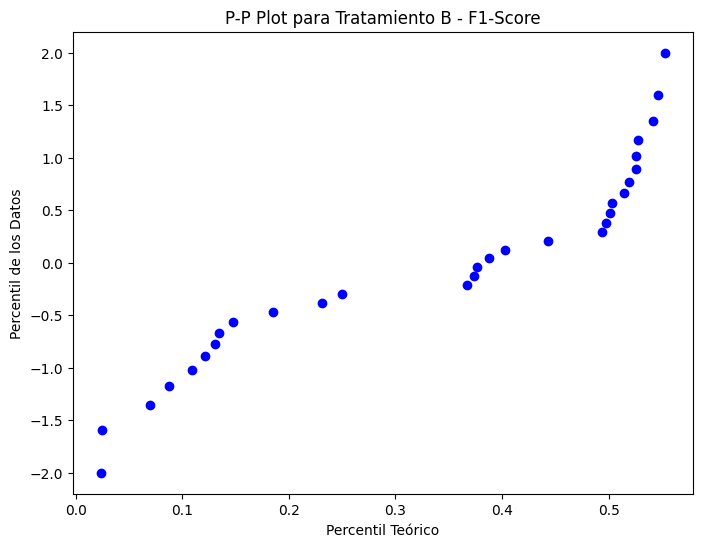

In [42]:
from scipy import stats

def plot_pp_plot(data, treatment, variable):
    plt.figure(figsize=(8, 6))

    # Calcular los cuantiles
    quantiles, pp_values = stats.probplot(data, dist='norm', fit=False)

    # Dibujar el P-P plot
    plt.scatter(pp_values, quantiles, color='blue')
    plt.title(f'P-P Plot para {treatment} - {variable}')
    plt.xlabel('Percentil Teórico')
    plt.ylabel('Percentil de los Datos')
    plt.show()

# P-P plot para Tratamiento A
plot_pp_plot(results_df['F1-Score Tratamiento A'], 'Tratamiento A', 'F1-Score')

# P-P plot para Tratamiento B
plot_pp_plot(results_df['F1-Score Tratamiento B'], 'Tratamiento B', 'F1-Score')

Por parte de los histogramas, no hay valores que se destaquen o que estén significativamente separados del resto de la distribución, por lo que no hay valores extremos evidentes. En los diagramas de cajas, no hay puntos fuera de los bigotes, sugiriendo que no hay valores extremos claramente definidos. Y, según el p-p plot, como los puntos están cerca de la línea diagonal, indica que los datos se ajustan bien a la distribución teórica y no hay valores extremos obvios.

Dado que los estadísticos descriptivos y las visualizaciones son idénticos para ambos tratamientos, no parece haber una mejora significativa en términos del F-1 Score.

Los histogramas, diagramas de caja y gráficos P-P proporcionan información valiosa sobre la distribución de los datos, pero no son pruebas formales de normalidad. En este caso, la apariencia  puede ser engañosa y no siempre es suficiente para concluir sobre la normalidad de los datos.Es recomendable realizar pruebas de normalidad.

### **6. Kolmogorov-Smirnov y Jarque-Bera**


In [49]:
from scipy.stats import ks_2samp, jarque_bera, levene


# Definir las muestras de datos para Tratamiento A y B para Variable 1 y Variable 2
tratamiento_A_var1 = f1_scores_A_pytorch
tratamiento_B_var1 = f1_scores_B_pytorch

# Prueba de Kolmogorov-Smirnov
ks_stat_var1_AB, ks_pvalue_var1_AB = ks_2samp(f1_scores_A_pytorch, f1_scores_B_pytorch)

# Prueba de Jarque-Bera
jb_stat_var1_A, jb_pvalue_var1_A = jarque_bera(f1_scores_A)
jb_stat_var1_B, jb_pvalue_var1_B = jarque_bera(f1_scores_B)

# Prueba de homocedasticidad (Levene's test)
levene_stat_var1, levene_pvalue_var1 = levene(tratamiento_A_var1, tratamiento_B_var1)

# Imprimir resultados

print(f'KS: {ks_stat_var1_AB}, p-value: {ks_pvalue_var1_AB}')
print(f'Jarque-Bera Tratamiento A: {jb_stat_var1_A}, p-value: {jb_pvalue_var1_A}')
print(f'Jarque-Bera Tratamiento B: {jb_stat_var1_B}, p-value: {jb_pvalue_var1_B}')
print(f'Homocedasticidad Tratamiento A vs Tratamiento B: {levene_stat_var1}, p-value: {levene_pvalue_var1}')


KS: 0.0, p-value: 1.0
Jarque-Bera Tratamiento A: 3.3574447417582522, p-value: 0.18661224503586393
Jarque-Bera Tratamiento B: 3.3574447417582522, p-value: 0.18661224503586393
Homocedasticidad Tratamiento A vs Tratamiento B: 0.0, p-value: 1.0


Con KS, un p-valor de 1.0 indica que no hay evidencia suficiente para rechazar la hipótesis nula. Esto sugiere que las distribuciones de los tratamientos A y B son estadísticamente indistinguibles.

Un p-valor relativamente alto (0.1866) en ambas pruebas de Jarque-Bera sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de normalidad para ninguno de los tratamientos.

Igualmente, un p-valor de 1.0 indica que no hay suficiente evidencia para rechazar la hipótesis nula de homogeneidad de varianzas entre los tratamientos A y B.



### **7. Mann-Whitney U Test**

Dado que las variables de respuesta no pueden ser claramente clasificadas como normales, y presentan homocedasticidad, se implementa Mann-Whitney U Test para determinar si existe una diferencia significativa.



In [69]:
from scipy.stats import mannwhitneyu

#prueba de Mann-Whitney U
statistic, pvalue = mannwhitneyu(f1_scores_A_pytorch, f1_scores_B_pytorch, alternative='two-sided')

#resultados
print(f'Estadístico de prueba (Mann-Whitney U): {statistic}')
print(f'p-valor: {pvalue}')

if pvalue < 0.05:
    print('El p-valor es menor que 0.05, lo que sugiere que hay una diferencia estadísticamente significativa entre los tratamientos.')
else:
    print('El p-valor es mayor que 0.05, lo que sugiere que no hay una diferencia significativa.')


Estadístico de prueba (Mann-Whitney U): 450.0
p-valor: 1.0
El p-valor es mayor que 0.05, lo que sugiere que no hay una diferencia significativa.


No encontramos una diferencia clara entre los dos métodos que estamos comparando. Ninguno de los dos parece ser significativamente mejor que el otro en función de nuestras mediciones.

La técnica que usamos para elegir qué características son importantes no parece estar marcando una gran diferencia en este caso.

Otros elementos a considerar:

A veces, las características elegidas por métodos automáticos pueden ser difíciles de entender. Es importante que podamos explicar por qué elegimos ciertas características.

Algunos métodos para elegir características pueden ser lentos. Esto es importante en situaciones donde necesitamos ser rápidos o usar menos recursos computacionales

Si conocemos bien el tema, puede haber características que sabemos que son muy importantes pero que no son destacadas por métodos automáticos.



Basados en los resultados obtenidos, parece que el nuevo método de selección de características propuesto no ofrece una mejora notable. Sin embargo, si hay otros aspectos o consideraciones que pueden influir en la decisión final.